In [58]:
import os
import json
import pprint
def list_files_and_folders(directory):
    # Получаем список всех элементов в указанной директории
    all_items = os.listdir(directory)
    # Разделяем элементы на папки и файлы
    folders = [item for item in all_items if os.path.isdir(os.path.join(directory, item))]
    files = [item for item in all_items if os.path.isfile(os.path.join(directory, item))]

    return folders, files

x="vake/-28905875/"

comments=[]
for j_name in list_files_and_folders("vake/-28905875")[1]:
    with open(x + j_name, 'r') as fl:
        jsn = json.load(fl)
        for coms in jsn['comments']:
            comments.append([coms['from_id'],coms['text'],coms['date'],jsn['id'],coms['user']])


In [6]:
import pandas as pd


In [59]:
df=pd.DataFrame(comments,columns=['vk_id','text','date','comment_id','json_user'])
df = df.query('vk_id >= 1')


In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def preprocess_text(text):
    # Преобразование текста в нижний регистр
    text = text.lower()

    # Удаление знаков пунктуации
    text = text.translate(str.maketrans("", "", string.punctuation))

    return text
def remove_id_mentions(text):
    return re.sub(r'\[id\d+', '', text)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    stop_words = set(stopwords.words('russian'))  # Замените на язык вашего текста
    return ' '.join([word for word in text.split() if word not in stop_words])

In [60]:
df['text'] = df['text'].apply(remove_id_mentions)


In [61]:

# Предобработка текста
df['text'] = df['text'].apply(preprocess_text)

# Лемматизация
df['text'] = df['text'].apply(lemmatize_text)

# Удаление стоп-слов
df['text'] = df['text'].apply(remove_stopwords)

In [62]:
df

,vk_id,text,date,comment_id,json_user
0,428568547,,1702493407,32937664,"{'id': 428568547, 'first_name': 'Даниил', 'las..."
1,645677974,боже,1702493419,32937664,"{'id': 645677974, 'first_name': 'Erik', 'last_..."
2,434832758,буду отсутствовать,1702493513,32937664,"{'id': 434832758, 'bdate': '21.5.2000', 'city'..."
3,704690916,равшан джамшута идёт нахуй,1702493519,32937664,"{'id': 704690916, 'bdate': '12.3', 'first_name..."
4,607281128,нагано баста баста слишком серьезн дерьма заня...,1702493666,32937664,"{'id': 607281128, 'bdate': '8.5.2000', 'first_..."
...,...,...,...,...,...
12846,814540656,ярослав твоей мамки ног,1702843964,32962141,"{'id': 814540656, 'first_name': 'Адольф', 'las..."
12847,150351110,адольф подошёл спросил говорит остались твои усы,1702844042,32962141,"{'id': 150351110, 'bdate': '10.7.1999', 'city'..."
12848,745304675,дмитрий зналчто пропал,1702844282,32962141,"{'id': 745304675, 'bdate': '15.11', 'city': {'..."
12849,808831810,вадим бегал кайфовал,1702844309,32962141,"{'id': 808831810, 'bdate': '17.8.1993', 'first..."


In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Создаем экземпляр анализатора сентимента
sia = SentimentIntensityAnalyzer()

# Функция для определения тональности текста
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Позитивный'
    elif compound_score <= -0.05:
        return 'Негативный'
    else:
        return 'Нейтральный'

# Применение функции к столбцу 'text'
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Вывод DataFrame с добавленным столбцом 'sentiment'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
# Подсчет уникальных значений в столбце 'sentiment'
sentiment_counts = df['sentiment'].value_counts()

# Вывод статистики
print(sentiment_counts)

sentiment
Нейтральный    12608
Негативный        43
Позитивный        32
Name: count, dtype: int64


In [65]:

from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Токенизация и подсчет частоты упоминания слов
all_words = word_tokenize(" ".join(df['text']))
words_freq = FreqDist(all_words)

# Вывод частоты упоминания слов
print("Частота упоминания слов:")
for word, freq in sorted(words_freq.items(),key=lambda x:-x[1])[:20]:
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Частота упоминания слов:
это: 1307
слово: 301
просто: 263
пацана: 231
админ: 213
сериал: 199
ещё: 194
че: 193
вообще: 181
андрей: 176
олег: 150
всё: 149
александр: 148
8: 147
тебе: 144
нахуй: 138
почему: 132
похуй: 129
сергей: 124
2: 117


In [66]:
df2=df.copy()

In [49]:
import datetime

In [67]:
def convert_unix_to_datetime(unix_time):
    return (unix_time+3*60*60)%86400//3600

# Применение функции к столбцу 'date'
df2['datetime'] = df2['date'].apply(convert_unix_to_datetime)


df2

,vk_id,text,date,comment_id,json_user,sentiment,datetime
0,428568547,,1702493407,32937664,"{'id': 428568547, 'first_name': 'Даниил', 'las...",Нейтральный,21
1,645677974,боже,1702493419,32937664,"{'id': 645677974, 'first_name': 'Erik', 'last_...",Нейтральный,21
2,434832758,буду отсутствовать,1702493513,32937664,"{'id': 434832758, 'bdate': '21.5.2000', 'city'...",Нейтральный,21
3,704690916,равшан джамшута идёт нахуй,1702493519,32937664,"{'id': 704690916, 'bdate': '12.3', 'first_name...",Нейтральный,21
4,607281128,нагано баста баста слишком серьезн дерьма заня...,1702493666,32937664,"{'id': 607281128, 'bdate': '8.5.2000', 'first_...",Нейтральный,21
...,...,...,...,...,...,...,...
12846,814540656,ярослав твоей мамки ног,1702843964,32962141,"{'id': 814540656, 'first_name': 'Адольф', 'las...",Нейтральный,23
12847,150351110,адольф подошёл спросил говорит остались твои усы,1702844042,32962141,"{'id': 150351110, 'bdate': '10.7.1999', 'city'...",Нейтральный,23
12848,745304675,дмитрий зналчто пропал,1702844282,32962141,"{'id': 745304675, 'bdate': '15.11', 'city': {'...",Нейтральный,23
12849,808831810,вадим бегал кайфовал,1702844309,32962141,"{'id': 808831810, 'bdate': '17.8.1993', 'first...",Нейтральный,23


In [68]:
time_of_day_counts = df2['datetime'].value_counts()
time_of_day_counts

datetime
12    999
14    913
22    825
16    785
0     730
23    721
15    721
13    710
11    700
17    694
18    653
21    645
10    644
20    584
9     551
19    494
8     350
7     258
1     212
2     142
6     104
4      85
5      82
3      81
Name: count, dtype: int64

TypeError: float() argument must be a string or a real number, not 'NoneType'

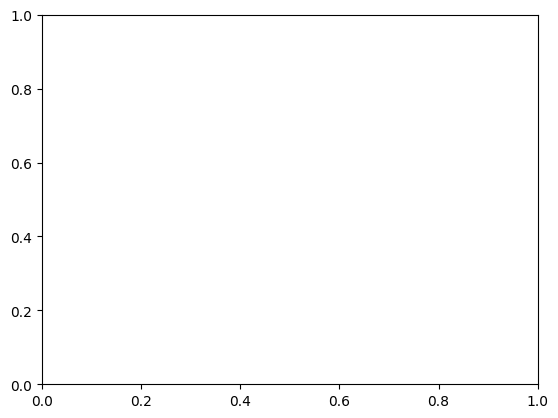

In [78]:
# Добавление меток и заголовка
import matplotlib.pyplot as plt
# Создание гистограммы
df3=pd.DataFrame(time_of_day_counts)
df3
# plt.figure(figsize=(10, 6))
plt.bar(df3,height=0.8, color='blue', edgecolor='black')
#
# plt.xlabel('Дата')
# plt.ylabel('Количество')
# plt.title('Гистограмма по времени')
#
# # Отображение гистограммы
plt.show()